# Scipy科学计算基础

- 常量模块
- 线性代数
- 插值函数
- 图像处理
- 优化方法
- 信号处理
- 统计函数
- 稀疏矩阵

In [1]:
import scipy

scipy.__version__

'1.4.1'

## 常量模块

In [2]:
from scipy import constants

constants.pi

3.141592653589793

黄金分割常数

In [3]:
constants.golden

1.618033988749895

真空中光速

In [4]:
constants.c, constants.speed_of_light  # 两种写法

(299792458.0, 299792458.0)

普朗克系数

In [5]:
constants.h, constants.Planck

(6.62607015e-34, 6.62607015e-34)

## 线性代数

矩阵求逆

In [6]:
import numpy as np
from scipy import linalg

linalg.inv(np.matrix([[1, 2], [3, 4]]))

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

奇异值分解

In [7]:
U, s, Vh = linalg.svd(np.random.randn(5, 4))
U, s, Vh

(array([[ 0.79705319,  0.17913949,  0.33963499,  0.37017621, -0.28325413],
        [ 0.50553549,  0.28969746, -0.34334792, -0.49916294,  0.54171748],
        [-0.09542757,  0.06745842,  0.84285053, -0.51259416,  0.11486144],
        [-0.12473753,  0.61247617, -0.19187503, -0.36071138, -0.66512011],
        [-0.29064449,  0.71014557,  0.13981146,  0.47004303,  0.41319652]]),
 array([2.9216748 , 2.23994035, 0.84242992, 0.59641955]),
 array([[ 0.01686016,  0.7902976 , -0.58597699,  0.17825937],
        [ 0.79525288, -0.06036289,  0.12124514,  0.59095583],
        [-0.59274543, -0.18243625, -0.02458272,  0.78406987],
        [-0.12625946,  0.58181014,  0.80082849,  0.06503258]]))

最小二乘法

y = ax^2 + b 分布

In [8]:
x = np.array([1, 2.5, 3.5, 4, 5, 7, 8.5])
y = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])

In [9]:
M = x[:, np.newaxis]**[0, 2]
M

array([[ 1.  ,  1.  ],
       [ 1.  ,  6.25],
       [ 1.  , 12.25],
       [ 1.  , 16.  ],
       [ 1.  , 25.  ],
       [ 1.  , 49.  ],
       [ 1.  , 72.25]])

In [10]:
p = linalg.lstsq(M, y)[0]
p

array([0.20925829, 0.12013861])

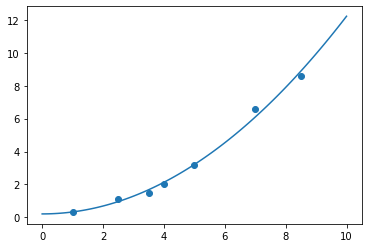

In [11]:
from matplotlib import pyplot as plt

plt.scatter(x, y)
xx = np.linspace(0, 10, 100)
yy = p[0] + p[1]*xx**2
plt.plot(xx, yy)

## 插值函数

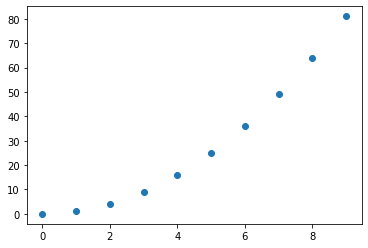

In [12]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([0, 1, 4, 9, 16, 25, 36, 49, 64, 81])

plt.scatter(x, y)

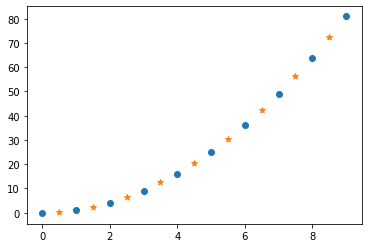

In [13]:
from scipy import interpolate

xx = np.array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5])  # 两点之间的点的 x 坐标
f = interpolate.interp1d(x, y)  # 使用原样本点建立插值函数
yy = f(xx)  # 映射到新样本点

plt.scatter(x, y)
plt.scatter(xx, yy, marker='*')

## 图像处理

In [14]:
from scipy import misc

face = misc.face()
face

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ...,
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ...,
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ...,
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ...,

       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ...,
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ...,
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ...,
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,  92]]

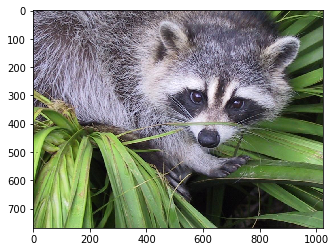

In [15]:
plt.imshow(face)

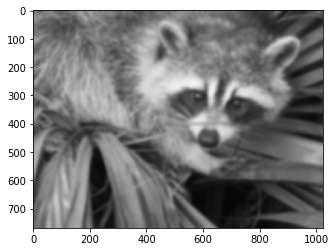

In [17]:
from scipy import ndimage

# 对图像进行高斯模糊处理
plt.imshow(ndimage.gaussian_filter(face, sigma=5))

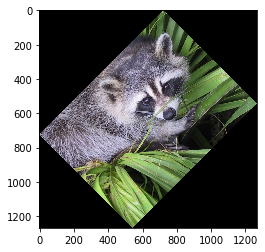

In [18]:
plt.imshow(ndimage.rotate(face, 45))

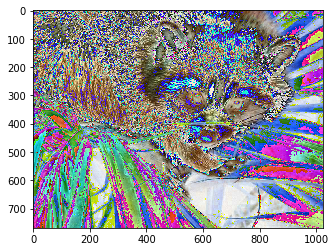

In [19]:
# 卷积
k = np.random.randn(2, 2, 3)
plt.imshow(ndimage.convolve(face, k))

##  优化方法

In [20]:
def func(p, x):
    w0, w1 = p
    f = w0 + w1*x*x
    return f


def err_func(p, x, y):
    ret = func(p, x) - y
    return ret

In [21]:
from scipy.optimize import leastsq

p_init = np.random.randn(2)  # 生成 2 个随机数
x = np.array([1, 2.5, 3.5, 4, 5, 7, 8.5])
y = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])
# 使用 Scipy 提供的最小二乘法函数得到最佳拟合参数
parameters = leastsq(err_func, p_init, args=(x, y))
parameters[0]

array([0.20925828, 0.12013861])

## 信号处理

Text(0.5, 1.0, 'gausspulse')

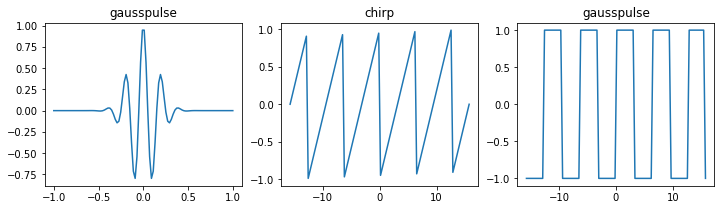

In [22]:
from scipy import signal

t = np.linspace(-1, 1, 100)

fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].plot(t, signal.gausspulse(t, fc=5, bw=0.5))
axes[0].set_title("gausspulse")
t *= 5*np.pi
axes[1].plot(t, signal.sawtooth(t))
axes[1].set_title("chirp")
axes[2].plot(t, signal.square(t))
axes[2].set_title("gausspulse")

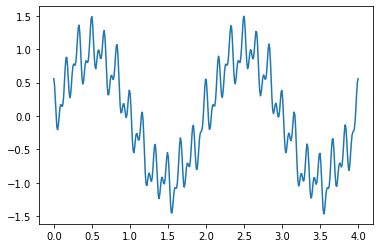

In [23]:
def f(t): return np.sin(np.pi*t) + 0.1*np.cos(7*np.pi*t+0.3) + \
    0.2 * np.cos(24*np.pi*t) + 0.3*np.cos(12*np.pi*t+0.5)


t = np.linspace(0, 4, 400)
plt.plot(t, f(t))

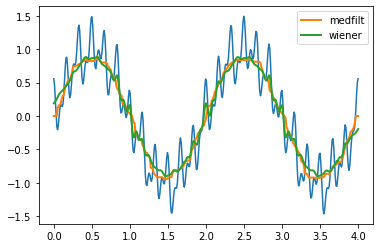

In [24]:
plt.plot(t, f(t))
plt.plot(t, signal.medfilt(f(t), kernel_size=55), linewidth=2, label="medfilt")
plt.plot(t, signal.wiener(f(t), mysize=55), linewidth=2, label="wiener")
plt.legend()

## 统计函数

(array([ 23.,  56., 161., 236., 258., 183.,  64.,  14.,   4.,   1.]),
 array([-2.90094256, -2.19172846, -1.48251436, -0.77330027, -0.06408617,
         0.64512793,  1.35434202,  2.06355612,  2.77277022,  3.48198431,
         4.19119841]),
 <a list of 10 Patch objects>)

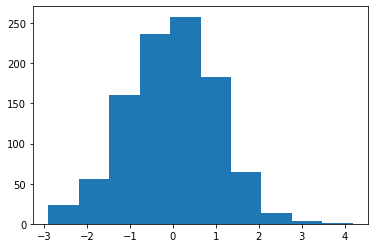

In [25]:
from scipy.stats import norm

plt.hist(norm.rvs(size=1000))

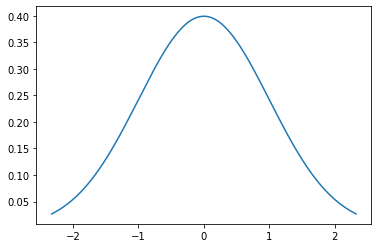

In [26]:
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 1000)
plt.plot(x, norm.pdf(x))

In [27]:
from scipy.stats import describe

describe(x)

DescribeResult(nobs=1000, minmax=(-2.3263478740408408, 2.3263478740408408), mean=0.0, variance=1.8093857372505617, skewness=9.356107558947013e-17, kurtosis=-1.2000024000024)

## 稀疏矩阵

数值分析中，元素大部分为零的矩阵被称为  稀疏矩阵。反之，如果大部分元素都非零，则这个矩阵是稠密的。在科学与工程领域中求解线性模型时经常出现大型的稀疏矩阵。但是计算机在执行稀疏矩阵运算时，通常会遇到很多麻烦。由于其自身的稀疏特性，通过压缩可以大大节省稀疏矩阵的内存代价。更为重要的是，由于过大的尺寸，标准的算法经常无法操作这些稀疏矩阵。

In [28]:
from scipy.sparse import csr_matrix

array = np.array([[2, 0, 0, 3, 0, 0], [1, 0, 1, 0, 0, 2], [0, 0, 1, 2, 0, 0]])
csr = csr_matrix(array)
print(csr)

  (0, 0)	2
  (0, 3)	3
  (1, 0)	1
  (1, 2)	1
  (1, 5)	2
  (2, 2)	1
  (2, 3)	2


In [29]:
from scipy.sparse import csc_matrix

csc = csc_matrix(array)
print(csc)

  (0, 0)	2
  (1, 0)	1
  (1, 2)	1
  (2, 2)	1
  (0, 3)	3
  (2, 3)	2
  (1, 5)	2


In [30]:
csc.todense()

matrix([[2, 0, 0, 3, 0, 0],
        [1, 0, 1, 0, 0, 2],
        [0, 0, 1, 2, 0, 0]], dtype=int32)

In [31]:
from scipy.stats import uniform

data = uniform.rvs(size=1000000, loc=0, scale=2).reshape(1000, 1000)
data[data < 1] = 0
data

array([[0.        , 0.        , 0.        , ..., 0.        , 1.96918179,
        1.36984126],
       [1.31376273, 0.        , 1.63885555, ..., 1.44740353, 1.99475169,
        0.        ],
       [1.45369352, 0.        , 1.91242326, ..., 1.87337907, 0.        ,
        1.80742815],
       ...,
       [0.        , 1.10527301, 1.8068864 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.95688469, 0.        , ..., 1.2147715 , 1.84249068,
        1.50865988],
       [1.69844001, 0.        , 1.0300453 , ..., 0.        , 0.        ,
        1.6859917 ]])

In [32]:
data.nbytes/(1024**2)

7.62939453125

In [33]:
data_csr = csr_matrix(data)
data_csr.data.size/(1024**2)

0.47801971435546875